In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
from astropy.modeling import models

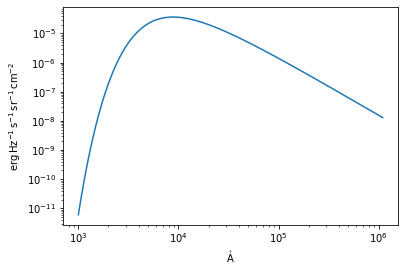

In [34]:
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.visualization import quantity_support

bb = BlackBody(temperature=5778*u.K)
wav = np.arange(1000, 1100000) * u.AA
flux = bb(wav)

with quantity_support():
    plt.figure()
    plt.loglog(wav, flux)
    plt.show()

# Blackbody Radiation

Blackbody = a physical body that absorbs all electromagnetic radiation incident on it. "A perfect absorber/emitter of radiation" - which means the efficiency of absorption/emissions is 1.

The distribution of the emitted radiation with frequency/wavlenegth is determined by the object's temperature $T$, accround to the Planck blackbody radiation law (see the website for the full derivation, combines information from PY2102 and PY2104).

$$
    u(\omega,T)d\omega = \frac{\hbar \omega^3 d\omega}{2 \pi^2 c^2 \left(\exp\left[\frac{\hbar \omega}{kT}\right]-1\right)}
$$

This gives emitted energy density as a function of $\omega$. This gives the spectrum of an object. The peak of this function occurs at

$$
    \frac{du}{d\omega} = 0
$$

which has the solution

$$
    (3-\beta \hbar \omega)\exp(\beta \hbar \omega) = 3
$$

where $\beta = 1/kT$. This is a transcendental equation, and must be either solved graphically or numerically. The solution is 

$$
    \frac{\hbar \omega_{\rm peak}}{kT} = \frac{h \nu_{\rm peak}}{kT} = 2.822
$$
which is the Wien displacement law. This relates the frequency at which a blackbody peaks with the temperature of the object. This peak moves towards higher frequencies for objects with higher temperatures.

Also, note that the blackbody curve for a higher T lies completely above the blackbody curve for a lower T. Consider

$$
    \frac{u(\omega,T_1)}{u(\omega,T_2)} = \frac{\left(\exp\left[\frac{\hbar \omega}{kT_2}\right]-1\right)}{\left(\exp\left[\frac{\hbar \omega}{kT_1}\right]-1\right)}
$$

which is always $>1$ if $T_1>T_2$.

Now, let's look at the equation in a bit more detail

## Low-frequency limit for Black-body radiation
Consider first the condition $\frac{\hbar \omega}{kT}<<1$, which means that $\exp\left[\frac{\hbar \omega}{kT}\right] \sim 1+\frac{\hbar \omega}{kT}$. This means that
$$
    u(\omega,T)d\omega = \frac{\hbar \omega^3 d\omega}{2 \pi^2 c^2 \left(\frac{\hbar \omega}{kT}\right)}
$$
$$
    u(\omega,T)d\omega = \frac{k T \omega^2 d\omega}{2 \pi^2 c^2}
$$
This is known as the Rayleigh Jeans (classical) limit. When first dervied, it was quickly shown that it couldn't be fully correct. To understand why, consider the limit $\omega \rightarrow \infty$, then $u(\omega,T)\rightarrow \infty$. This is known as the "ultraviolet catastrophe", as it sugested that objects emitted infinite energy!

## High-frequency limit for Black-body radiation
Consider now the condition $\frac{\hbar \omega}{kT}>>1$, which means that $\exp\left[\frac{\hbar \omega}{kT}\right] >>1$. This means that
$$
    u(\omega,T)d\omega = \frac{\hbar \omega^3 }{2 \pi^2 c^2} \exp\left[-\frac{\hbar \omega}{kT}\right]d\omega
$$

## Total Energy density of Black-body radiation
Ok, so we know the shape of the spectrum now, and the two limits of it. Next, we want to ask the question - what is the total energy density of black body radation? To do this, we must integrate over $\omega$.
$$
    u(T) = \int_0^{\infty} u(\omega,T)d\omega
$$
$$
    u(T) = \int_0^{\infty} \frac{\hbar \omega^3 d\omega}{2 \pi^2 c^2 \left(\exp\left[\frac{\hbar \omega}{kT}\right]-1\right)}
$$
Can tackle this using substitution of variables. Let $x=\frac{\hbar \omega}{kT}$, and $dx=\frac{\hbar d\omega}{kT}$. We then get
$$
    u(T) = \frac{\hbar}{2 \pi^2 c^2} \left[\frac{kT}{\hbar}\right]^4 \int_0^{\infty} \frac{x^3 dx}{e^x-1}
$$
That last term is a definite integral (can be looked up or thrown into a integral solver), and is $\frac{\pi^4}{15}$. So, we get
$$
    u(T) = \frac{\pi^2 k^4}{15 \hbar^3 c^2} T^4 = aT^4 
$$
This gives you the tnergy radiated per unit are per unit time by a black body surface.

Now, consider a small area $\Delta A$ on the wall of a cavity filled with black body radiation. If it's in equilibrium, then the energy absorbed by $\Delta A$ should be the same as the energy emitted by $\Delta A$. So, in order to find out how much energy that area is emitting, we are first going to calculate how much energy is absorbed by the surface, and assuem they are equal.

First, let's find energy absorbed. This is given by the number of photons hitting $\Delta A$. Total volume with photons capable of hitting $\Delta A$ in time $\Delta t$ - a half sphere of radius $c \Delta t$.


Now, consider a volume element in the half-sphere. Photons travelling isotropically (all directions). As such, the fraction that will hit $\Delta A$ is:
$$
    fraction = \frac{\Delta A \cos(\theta)}{4 \pi r^2}
$$
The total energy in the volume element is:
$$
    dE = u(T)dV
$$
$$
    dE = u(T)r^2\sin(\theta)drd\theta d\phi
$$
Therefore
$$
    dE_{\rm abs} = u(T) r^2 \sin \theta dr d\theta d\phi \frac{\Delta A \cos(\theta)}{4 \pi r^2}
$$
The total energy absorbed by $\Delta A$ in time $\Delta t$ is then given by integrating over the volume:
$$
    E_{\rm abs} = \int^{c \Delta t}_{0} \int^{\pi/2}_{0} \int^{2\pi}_{0} \frac{u(T) \Delta A}{4\pi } \cos \theta \sin \theta dr d\theta d\phi
$$

$$
    E_{\rm abs} = \frac{u(T) \Delta A}{4\pi }  \int^{c \Delta t}_{0} dr \int^{\pi/2}_{0} \cos \theta \sin \theta  d\theta \int^{2\pi}_{0}  d\phi
$$
The first integral is just $c\Delta t$, the last is $2\pi$, and the middle one can be done using the substitution $x=\sin\theta$. Doing this gives
$$
    E_{\rm abs} = \frac{1}{4} c \; u(T) \Delta A \Delta t = E_{\rm emit}
$$
This is the energy absorbed/smitted by an area $\Delta A$ in time $\Delta t$. So now, the energy emitted per unit time per unit area by a black body surface is
$$
    \frac{L}{A} = \frac{c}{4} u(T) = \frac{1}{4} c \; a \; T^4 = \sigma T^4
$$
where $\sigma$ is the Stefan Boltzmann constant. Accounting for efficiency:
$$
    \frac{L}{A} = \epsilon \sigma T^4
$$
where $0<\epsilon<1$, 1 for a perfect Black body.